In [9]:
import numpy as np
import pandas as pd
from keras.datasets import mnist

In [10]:
(_, _), (X_test, Y_test) = mnist.load_data()
print(X_test.shape)
print(Y_test)
Y_test = Y_test[:, np.newaxis] # Creates a new axis and then takes all the elements and puts them along that axis
print(Y_test)


X_test = X_test.reshape(X_test.shape[0], -1)
# print(X_test[0])
# print(X_test.shape)
test_data = np.concatenate((Y_test, X_test), axis=1) # joins a sequence of arrays along an access
# print(test_data.shape)

data = pd.read_csv('train.csv')
# test_data = pd.read_csv('test.csv')
data = np.array(data)
# test_data = np.array(test_data)
print(data[0])
# print(test_data.shape)

# This is the shape of the data, we have 42,000 images and an array of 785 values
# for each of these images (label in the first column, 2-785 are the pixel values)
print(data.shape)
m, n = data.shape

(10000, 28, 28)
[7 2 1 ... 4 5 6]
[[7]
 [2]
 [1]
 ...
 [4]
 [5]
 [6]]
[  1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0 188 255  94   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 191 250
 253  93   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0 123 248 253 167  10   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  80 247
 253 208  13   0   0   0   0   0   0   0   0   0   0  

In [11]:
# Now we shuffle the data (example below)
test_arr = np.array([[1,2.2,3.3], [3,4.4,5.5], [5,6.6,7.7]])
np.random.shuffle(test_arr)
print(test_arr)

# Show we shuffle all the images to throw into the model (reduces bias and introduces independence)
np.random.shuffle(data)

[[1.  2.2 3.3]
 [3.  4.4 5.5]
 [5.  6.6 7.7]]


In [12]:
# Now we transpose the array (example)
t_test_array = test_arr.T
print(t_test_array)

# We want to transpose the entire x data (first we are slicing an array from the start
# to the end at 46,000 that generates a new arry). Then transpose so we can pass into neural network 
# (because imput layer is vertical):
data_train = data[0:m].T
data_test = test_data[0:m].T
print(data_train.shape)
print(data_test.shape)

[[1.  3.  5. ]
 [2.2 4.4 6.6]
 [3.3 5.5 7.7]]
(785, 42000)
(785, 10000)


In [13]:
# After the transpose, the first row of the data is going to be the labels (which is your y)
# Example 
y_label_test_array = t_test_array[0]
x_label_test_array = t_test_array[1:]

print(y_label_test_array)
print(x_label_test_array)

Y_train = data_train[0]
X_train = data_train[1:]
Y_test = data_test[0]
X_test = data_test[1:]
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

[1. 3. 5.]
[[2.2 4.4 6.6]
 [3.3 5.5 7.7]]
(784, 42000)
(42000,)
(784, 10000)
(10000,)


In [14]:
# We divide the training data to normalize the inputs to fall into the 0 to 1 range (grayscaling)
# The "."" here makes sure we do float division 
X_train = X_train / 255.
print(X_train.shape)


(784, 42000)


In [24]:
print(np.random.rand(10, 784) - 0.5)

[[-0.32710792 -0.21219168  0.27787794 ... -0.32118017 -0.4055228
   0.44591247]
 [-0.09018721  0.16055293  0.31451384 ...  0.06422104 -0.21319464
   0.23778253]
 [ 0.20592813 -0.21909118  0.41785979 ...  0.09647195 -0.01137794
  -0.01343931]
 ...
 [ 0.40193827  0.0233195  -0.48614356 ...  0.0771874   0.28443539
   0.19841929]
 [ 0.45424373 -0.16821958  0.27198243 ...  0.35794233  0.41729677
  -0.27210167]
 [-0.11891811 -0.43827529 -0.262051   ...  0.08958475  0.20294349
   0.36435376]]


In [23]:
def init_params():
    # Initialize weights and biases for a neural network with one hidden layer.
    # W1 is the weight matrix for the connections between the input layer and the hidden layer.
    # b1 is the bias vector for the hidden layer.
    # W2 is the weight matrix for the connections between the hidden layer and the output layer.
    # b2 is the bias vector for the output layer.

    # We want to include the bias terms here to make sure the model learns and the does not get a bunch of zeros 

    # Here we use np.random.rand to generate random numbers between 0 and 1. (if we leave at this value the outputs of the neurons can become 
    # very small or very large which would I turn lead to the the gradient becoming very small or the "vanishing gradient problem")
    
    # By subtracting 0.5, we shift the range to be between -0.5 and 0.5. (convergence during training as weights initialized close to zero
    # lead to faster convergence).

    # The input layer has 784 neurons (for 28x28 pixel images, 784 = 28 * 28),
    # and the hidden layer has 10 neurons (can be changed).
    W1 = np.random.rand(10, 784) - 0.5

    # The bias vector for the hidden layer has 10 elements, one for each neuron in the hidden layer.
    b1 = np.random.rand(10, 1) - 0.5

    # The output layer has 10 neurons (one for each class in a digit classification task).
    # W2 connects 10 neurons in the hidden layer to 10 neurons in the output layer.
    W2 = np.random.rand(10, 10) - 0.5

    # The bias vector for the output layer also has 10 elements.
    b2 = np.random.rand(10, 1) - 0.5

    return W1, b1, W2, b2

In [30]:
def ReLu(Z):
    # Input is going to be the activation after the weight dot product is taken and then bias is added 
    # ReLU stands for Rectified linear Unit 
    # Helps us learn non-linear features within the models, the ReLU function introduces non-linearity 
    # The return values is the output of the neurons in the hidden layer
    # Sets negative values to zero and then keeps all the positive values
    # np.maximum compares two arrays element wise and returns the maximum  
    return np.maximum(0, Z)

def deriv_ReLU(Z):
    # The derivative of ReLU
    # print(type(Z > 0))
    return Z > 0

def softmax(Z):
    # Softmax computes the raw scores of the nerons into probabilites that all sum up to 1
    # Softmax is helpful in multiclass classification problems where the network needs to know the probabilites of each class
    # This is calculated by computing the exponential score of each element and then dividing by the sum of all expoonents (normalizing)
    # print(Z.shape) # (10, 42000)
    # return 0
    # A = np.exp(Z) / np.sum(np.exp(Z), axis=0) # Using axis = 0 here to sum the columns (based of the equation we are summing up the classes)
    # return A 


    # Normalize by subtracting the max value in each column for numerical stability
    Z_shifted = Z - np.max(Z, axis=0)

    # Compute the exponentials of the shifted values
    exp_Z = np.exp(Z_shifted)

    # Compute the sum of exponentials along each column
    sum_exp_Z = np.sum(exp_Z, axis=0)

    # Compute the softmax values by dividing the exponentials by the sum of exponentials
    A = exp_Z / sum_exp_Z

    return A


def forward_prop(W1, b1, W2, b2, X):
    # print(W1.shape)
    # print(X.shape)
    # Now we do the linear transformation (the combines the weight and input tensor using the dot product and the weight)
    # The connecting part of the neurons is done by matrix multiplication (Weight tensor x X tensor...)
    # print(f"W1 shape: {W1.shape}")
    # print(f"X shape: {X.shape}")
    Z1 = W1.dot(X) + b1 #Z1 is the activation here
    # print(Z1[0])
    # ReLU helps us get the output of the of the neurons within the hidden layer 
    A1 = ReLu(Z1)
    # print(A1[0])
    # Now, we have to connect the neurons from the hidden layer to the output layer, this is done by taking another dot product and adding bias
    Z2 = W2.dot(A1) + b2
    # Now, we get the output of neurons in the output layer, since we want probablilies, we use the softmax equations (due to this being a classification problem)
    A2 = softmax(Z2)

    return Z1, A1, Z2, A2

def one_hot(Y):
    # One hot encoding tranforms the labels into a binary format that the network can use for calculating the loss (many loss functions need this)
    # First step is to create a matrix of with dimenstions (num_of_samples, number_of_classes)
    one_hot_Y = np.zeros((Y.size, Y.max() + 1)) # We use Y.max here because this will return 9 + 1 which is 10 total class for 0-9 digits
    # Now, for each sample, we are setting the element corresponding to its class to one
    # This generates an row indicies in an array of Y.size so like [0, 1,....41998, 41999].
    one_hot_Y[np.arange(Y.size), Y] = 1 
    # print(f'One hot array shape transpoded: {one_hot_Y.T.shape}')
    return one_hot_Y.T


def back_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    m = X.shape[1]
    # Back propagation is a key algorithm that helps us update the weights and biases of the NN by minimzing the loss function 
    # Primary goal is to minimize the loss function (do this by seeing how well the predictions match the actual label)
    # Back Prop does gradient descent to update the weights and bias (which allows us to update the params to reduce the loss)
    # propigates the error back through the network using the chain rule (gradient of the computed loss)

    # Back prop over the softmax and compute the gradient of the output layer
    one_hot_Y = one_hot(Y)
    # Gradient of cross entropy loss with respect to Z2 
    # Next, we subtract the one_hot_y from A2. If the predicted probability is high, then the loss will be low (this is the derivative of mean squared error) 
    dZ2 = A2 - one_hot_Y

    # The next step is to fine how W2 effects the lost. This is computed using the chain rule and is the derivative of the 
    # loss and the activations of the hidden layer. 
    dW2 = (1 / m) * dZ2.dot(A1.T)

    # The bias is the weighted sum of the inputs to the output layer. Sum all the gradients of the loss with resepect to Z2
    db2 = (1 / m) * np.sum(dZ2)


    # Now we have to backprop over the ReLU layer
    dA1 = W2.T.dot(dZ2)
    dZ1 = dA1 * deriv_ReLU(Z1) 

    dW1 = (1 / m) * dZ1.dot(X.T)
    db1 = (1 / m) * np.sum(dZ1)

    return dW1, db1, dW2, db2 

def update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    # Updating the weights in th opposite direction of the gradient of the loss 
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

In [32]:
Y_train_arr = np.array([0,4,2,1,3])
Y_train_arr_one_hot = one_hot(Y_train_arr)
print(Y_train_arr)
print(Y_train_arr_one_hot)

[0 4 2 1 3]
[[1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]]


In [31]:
W1, b1, W2, b2 = init_params()
Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X_train)
dW1, db1, dW2, db2  = back_prop(Z1, A1, Z2, A2, W1, W2, X_train, Y_train)



[[False False False ...  True  True False]
 [False False False ... False  True  True]
 [ True False False ...  True  True  True]
 ...
 [ True False False ...  True  True False]
 [ True  True  True ... False False  True]
 [ True False  True ...  True  True  True]]


In [20]:
# Next step is to get the predictions (getting the class with the highest probability within the output tensor from the output layer)
def get_predictions(A2):
    A2_max = np.argmax(A2, axis=0)
    return A2_max


# Next is to get the accuarcy of your predictions compared to the actual labels 
def get_accuracy(predictions, Y):
    num = np.sum(predictions == Y)
    return num / Y.size


In [21]:
# # Now we are actually running the gradient descent algo:
def gradient_descent(X_train, Y_train, X_test, Y_test, learning_rate, iterations):
    W1, b1, W2, b2 = init_params()

    train_accuracies = []
    test_accuracies = []

    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X_train)
        dW1, db1, dW2, db2  = back_prop(Z1, A1, Z2, A2, W1, W2, X_train, Y_train)

        W1, b1, W2, b2 = update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)

        if (i + 1) % 50 == 0:
            predictions = get_predictions(A2)
            train_accuracy = get_accuracy(predictions, Y_train)
            train_accuracies.append(train_accuracy)
            print(f'Iteration: {i + 1}, Train Accuarcy: {train_accuracy * 100:.2f}%')
            # print(f'X_test shape: {X_test.shape}')

            _, _, _, A2_test = forward_prop(W1, b1, W2, b2, X_test)
            # print(A2_test.shape)

            predictions_test = get_predictions(A2_test)
             # Debug print statements
            # print(f"Shape of predictions: {predictions_test.shape}")
            # print(f"Shape of Y_test: {Y_test.shape}")
            test_accuracy = get_accuracy(predictions_test, Y_test)
            test_accuracies.append(test_accuracy)
            print(f'Iteration: {i + 1}, Test Accuarcy: {test_accuracy * 100:.2f}%')

    return W1, b1, W2, b2, train_accuracies, test_accuracies    

In [22]:
W1, b1, W2, b2, train_accuracies, test_accuracies = gradient_descent(X_train, Y_train, X_test, Y_test, 0.10, 1000)

Iteration: 50, Train Accuarcy: 74.26%
Iteration: 50, Test Accuarcy: 73.68%
Iteration: 100, Train Accuarcy: 81.92%
Iteration: 100, Test Accuarcy: 81.12%


KeyboardInterrupt: 

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
def make_predictions(X, W1 ,b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions


def display_prediction(index, X , Y, W1, b1, W2, b2):
    vect_X = X[:, index].reshape(-1, 1)
    prediction = make_predictions(vect_X, W1, b1, W2, b2)
    label = Y[index]
    print("Model Prediction: ", prediction)
    print("Actual Label: ", label)

    display_X = X[:, index].reshape(28, 28)
    plt.gray()
    plt.imshow(display_X, interpolation='nearest')
    plt.show()

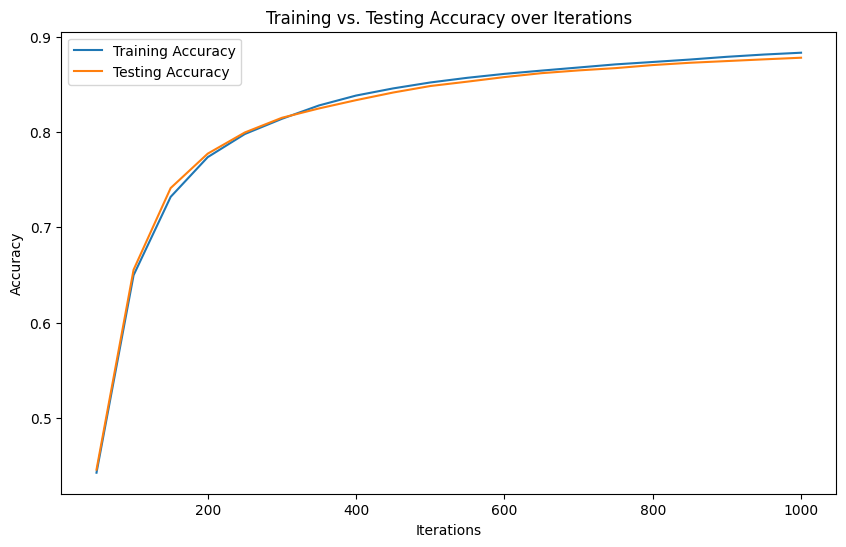

In [ ]:
iterations = range(50, 1001, 50)

plt.figure(figsize=(10,6))
plt.plot(iterations, train_accuracies, label='Training Accuracy')
plt.plot(iterations, test_accuracies, label='Testing Accuracy')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Training vs. Testing Accuracy over Iterations')
plt.legend()
plt.show()

Model Prediction:  [7]
Actual Label:  7


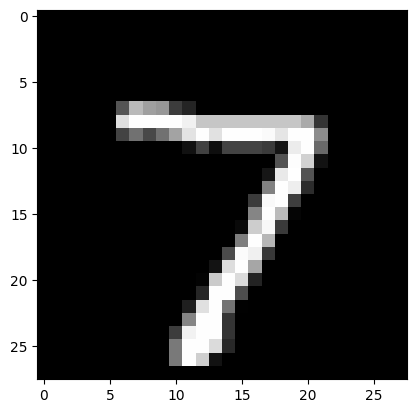

Model Prediction:  [2]
Actual Label:  2


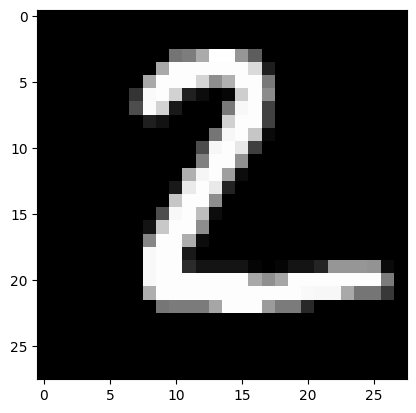

Model Prediction:  [1]
Actual Label:  1


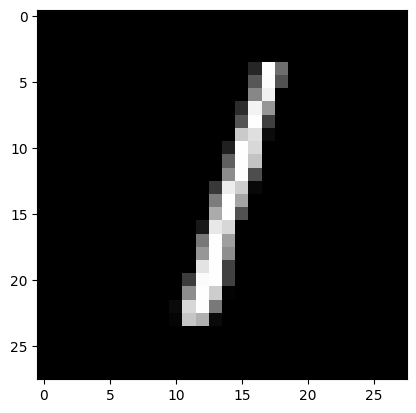

Model Prediction:  [0]
Actual Label:  0


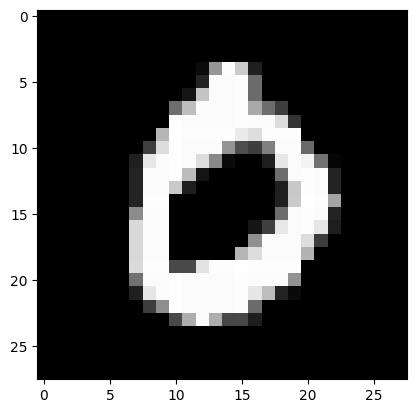

Model Prediction:  [4]
Actual Label:  4


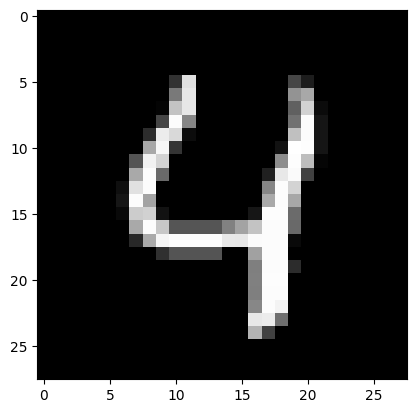

In [ ]:
for i in range(5):
    display_prediction(i, X_test, Y_test, W1, b1, W2, b2)

In [ ]:
import pickle

# Assuming W1, b1, W2, and b2 are your trained weights and biases
weights_biases = {
    'W1': W1,
    'b1': b1,
    'W2': W2,
    'b2': b2
}
with open('weights_biases.pkl', 'wb') as f:
    pickle.dump(weights_biases, f)